In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
city_bikes_df = pd.read_csv('../data/montreal_bike_stations.csv')
fsq_df = pd.read_csv('../data/foursquare_places.csv')
yelp_df = pd.read_csv('../data/yelp_places.csv')

### Join data from part 1 with data from part 2 to create a new dataframe

In [3]:
# Join the "fsq_df" data with the "yelp_df" data (default behaviour is full outer join on 
poi_df = pd.merge(fsq_df, yelp_df, on = ['city_bike_latitude', 'city_bike_longitude'])

# Join the "city_bikes_df" data with the "poi_df" data
all_data_df = pd.merge(city_bikes_df, poi_df, on = ['city_bike_latitude', 'city_bike_longitude'])

In [4]:
# Save DataFrame to a CSV file without row index value
all_data_df.to_csv("../data/all_data_df.csv", index = False)

In [5]:
all_data_df.info()
print(f"\n{all_data_df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64954 entries, 0 to 64953
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_name         64954 non-null  object 
 1   city_bike_latitude   64954 non-null  float64
 2   city_bike_longitude  64954 non-null  float64
 3   free_bikes           64954 non-null  int64  
 4   empty_slots          64954 non-null  int64  
 5   ebikes               64954 non-null  int64  
 6   fsq_name             64954 non-null  object 
 7   fsq_categories       64954 non-null  object 
 8   fsq_latitude         64954 non-null  float64
 9   fsq_longitude        64954 non-null  float64
 10  fsq_distance (m)     64954 non-null  int64  
 11  fsq_rating           56618 non-null  float64
 12  fsq_popularity       63816 non-null  float64
 13  fsq_price            45825 non-null  float64
 14  yelp_name            64954 non-null  object 
 15  yelp_categories      64954 non-null 

#### Data exploration: all data

Start by removing any unrelated columnn(s), in this case it would be "fsq_popularity" and "yelp_review_count". Although this information could be important on its own, it does not have any relation with one another in this context as they are different statistics.

In [6]:
# Remove the irrelevant columns
data_df_irrelevant_col = all_data_df.drop(columns = ['fsq_popularity', 'yelp_review_count'])

In [7]:
# Remove rows containing null values (default is row-wise or axis = 0)
data_df_non_null = data_df_irrelevant_col.dropna(subset = ['fsq_rating', 'fsq_price', 'yelp_price'])
print(f"\n{data_df_non_null.isna().sum()}")


station_name           0
city_bike_latitude     0
city_bike_longitude    0
free_bikes             0
empty_slots            0
ebikes                 0
fsq_name               0
fsq_categories         0
fsq_latitude           0
fsq_longitude          0
fsq_distance (m)       0
fsq_rating             0
fsq_price              0
yelp_name              0
yelp_categories        0
yelp_latitude          0
yelp_longitude         0
yelp_distance (m)      0
yelp_rating            0
yelp_price             0
dtype: int64


In [8]:
clean_data_df = data_df_non_null.copy()

# Standardize the 'rating' data by scaling "yelp_rating"
clean_data_df['yelp_rating'] = (clean_data_df['yelp_rating'])*2

# Standardize the 'price' data by mapping "yelp_rating" to numbers
yelp_price_map = {
    '$': 1,
    '$$': 2,
    '$$$': 3,
    '$$$$': 4
}
clean_data_df['yelp_price'] = clean_data_df['yelp_price'].map(yelp_price_map)

# Standardize by convert data to more appropriate types
clean_data_df['fsq_price'] = clean_data_df['fsq_price'].astype('int64')
clean_data_df['fsq_distance (m)'] = clean_data_df['fsq_distance (m)'].astype('float64')

clean_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33710 entries, 1 to 64934
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_name         33710 non-null  object 
 1   city_bike_latitude   33710 non-null  float64
 2   city_bike_longitude  33710 non-null  float64
 3   free_bikes           33710 non-null  int64  
 4   empty_slots          33710 non-null  int64  
 5   ebikes               33710 non-null  int64  
 6   fsq_name             33710 non-null  object 
 7   fsq_categories       33710 non-null  object 
 8   fsq_latitude         33710 non-null  float64
 9   fsq_longitude        33710 non-null  float64
 10  fsq_distance (m)     33710 non-null  float64
 11  fsq_rating           33710 non-null  float64
 12  fsq_price            33710 non-null  int64  
 13  yelp_name            33710 non-null  object 
 14  yelp_categories      33710 non-null  object 
 15  yelp_latitude        33710 non-null  floa

In [9]:
# Save DataFrame to a CSV file without row index value
clean_data_df.to_csv("../data/clean_data_df.csv", index = False)

### Provide a visualization that was used as part of your EDA process and explain the initial pattern or relationship you discovered through this visualization

#### Relationships between Foursquare and Yelp

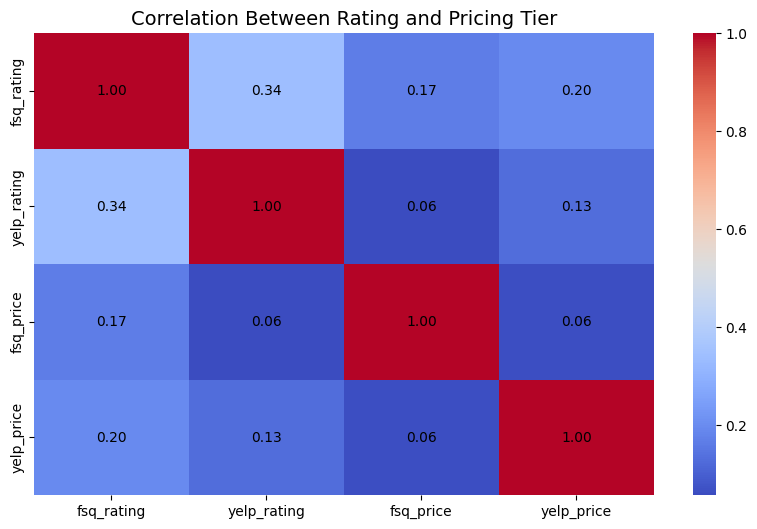

In [10]:
# Check to see if there is any correlation between the ratings provided (by Foursquare and Yelp) and the pricing tier of the place
ratings_and_price_corr = clean_data_df[['fsq_rating', 'yelp_rating', 'fsq_price', 'yelp_price']].corr()

# Plot the heatmap using 'figure()' to size it
plt.figure(figsize = (10, 6))
# sns.heatmap() is used to provide a graphical representation of data where values are depicted by colour
# 'ratings_and_price_corr' is our correlation matrix to visualize, 'annot' is used to display data in the first row, 'cmp' to define colour scheme, and fmt is the siginificant digits
ax = sns.heatmap(ratings_and_price_corr, annot = False, cmap = 'coolwarm', fmt = '.2f')

# Set the title
plt.title('Correlation Between Rating and Pricing Tier', fontsize = 14)

# To display the correlation values in each cell we can loop through each row and column
# shape[0] and shape[1] indices gives the number of rows and columns, respectively
for i in range(ratings_and_price_corr.shape[0]):
    for j in range(ratings_and_price_corr.shape[1]):
        
        text = "{:.2f}".format(ratings_and_price_corr.iloc[i, j])  # Use .iloc to access elements
        # Display the the values (considered text) based on (x,y) coordinates and aligned in the center 
        ax.text(j + 0.5, i + 0.5, text, ha = 'center', va = 'center', fontsize = 10)

plt.show()

The correlation coefficient is measured on a scale that varies from -1 to +1, we will follow these guidelines:
* 1.00: perfect correlation
* 0.80 to 0.99: very strong correlation
* 0.60 to 0.79: strong correlation
* 0.40 to 0.59: moderate correlation
* 0.20 to 0.39: weak correlation
* 0.00 to 0.19: very weak correlation

From the heatmap we can see:
* 'fsq_rating' and 'yelp_rating' have a weak correlation. They may use similar rating scales or metrics; however, it was determined that the total number of non-null ratings provided by Yelp was 6496, whereas Foursquare only provided 2887 non-null ratings. The diverse user bases and varying review styles based on the number of entries could have been the cause of such variability.
* 'fsq_price' and 'yelp_price' have a very weak/no correlation. The assumption made previously that we can map Yelp's price range of '\\$' to '\\$$$$' to Foursquare's price range of 1 to 4 is inaccurate, and there are other factors not considered.

There does not appear to be any correlation between the ratings providing and the pricing tier listed for both Foursquare and Yelp.

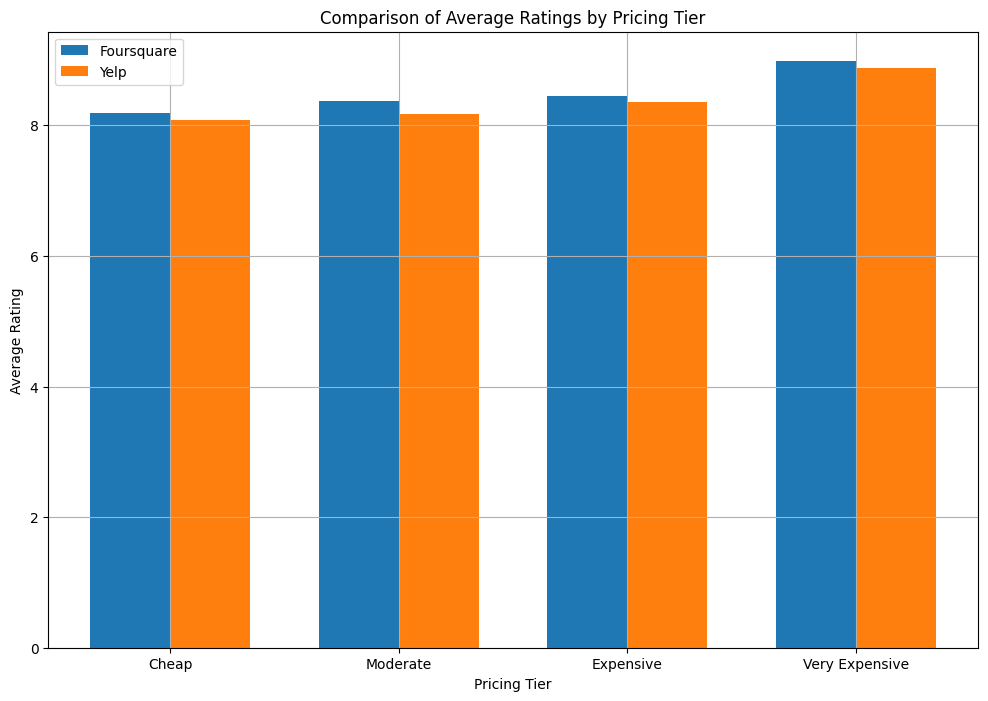

In [11]:
# Examine the average ratings by the pricing tier for each platform 
# We can use a for-loop to find the average over a range of [1, 4] inclusive
# Initialize an empty list to store mean ratings for each pricing tier
fsq_ratings = [] 
yelp_ratings = [] 

for i in range(1, 5): 
    # Filter data for the current price level and calculate the mean rating
    fsq_mean_rating = clean_data_df[clean_data_df['fsq_price'] == i]['fsq_rating'].mean()
    # Append the mean rating to the list
    fsq_ratings.append(fsq_mean_rating)

    yelp_mean_rating = clean_data_df[clean_data_df['yelp_price'] == i]['yelp_rating'].mean()
    yelp_ratings.append(yelp_mean_rating)
    
# Number of price levels
price_tiers = np.arange(1, 5)

# Width of each bar (to prevent overlap)
bar_width = 0.35

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(price_tiers - bar_width/2, fsq_ratings, bar_width, label = 'Foursquare')
plt.bar(price_tiers + bar_width/2, yelp_ratings, bar_width, label = 'Yelp')

plt.xlabel('Pricing Tier')
plt.ylabel('Average Rating')
plt.title('Comparison of Average Ratings by Pricing Tier')
# Define the pricing tiers based on Foursquare and Yelp field definitions
plt.xticks(price_tiers, ['Cheap', 'Moderate', 'Expensive', 'Very Expensive'])
plt.legend()
# Display gridlines
plt.grid(True)
plt.show()

From the bar chart, it can be observed that on average the platforms (Foursquare and Yelp) provide similar ratings (values) for each pricing tier. In addition, the average rating shows an increase for every increase in pricing tier (this makes sense as a user would have higher expectations for each additional dollar they spend).     

Note: The differences in average ratings between the platforms could most likely be due to any additional bias associated with a larger number of user reviews provided by Yelp compared to Foursquare.

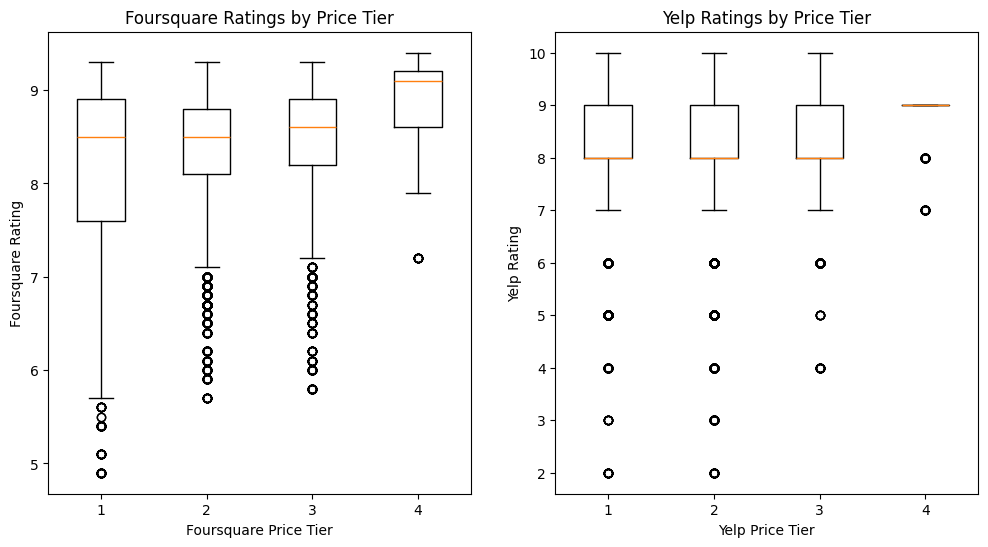

In [12]:
# Create a list of price tiers (corresponding to values in 'fsq_price' and 'yelp_price')
price_tiers = [1, 2, 3, 4]

# Initialize empty lists to store ratings and label for each price tier
fsq_ratings = []  
yelp_ratings = [] 
labels = [] 

for i in price_tiers:
    label = i  
    # Add the label to the list of labels
    labels.append(label) 
    
    # Filter ratings for the current price tier and add it to the list
    fsq_rating_tier = clean_data_df[clean_data_df['fsq_price'] == i]['fsq_rating']
    fsq_ratings.append(fsq_rating_tier)  
    
    yelp_rating_tier = clean_data_df[clean_data_df['yelp_price'] == i]['yelp_rating']
    yelp_ratings.append(yelp_rating_tier)  
    
# Create boxplots
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(fsq_ratings, labels = labels)
plt.xlabel('Foursquare Price Tier')
plt.ylabel('Foursquare Rating')
plt.title('Foursquare Ratings by Price Tier')

plt.subplot(1, 2, 2)
plt.boxplot(yelp_ratings, labels = labels)
plt.xlabel('Yelp Price Tier')
plt.ylabel('Yelp Rating')
plt.title('Yelp Ratings by Price Tier')

plt.show()

The boxplot helps us visualize the spread and skewness of the data, if outliers are present they are clearly visible. 

The box represents the interquartile range (IQR), the length of the box (IQR) is the spread of the central 50% of the data. In this case, it can be observed that the Foursquare rating for the first price tier has a wider spread of data within the range. A possible interpretation could be users that are paying for a cheap place have their expectations met (they got what they paid for), but there those that could bias the result as they may expect more out of what they are paying for at that price tier. In the case of Yelp ratings for the fourth price tier, it is observed that there is no box representation (or it is just really miniscule) and from examination (below) it can be seen that for Yelp, 968 ratings have a price tier of 4, this value is small in comparison to tier 1 (the second smallest) which could explain why the boxplot is barely/not visble. 

In addition, we can observe that there are more outliers (points outside whiskers) in Foursquare ratings than in Yelp ratings. However, the outlier ratings are more closely in Foursquare than in Yelp. This could mean there is a more underlying problem such as bad restaurant experiences at the same restaurant for different users.

In [13]:
clean_data_df['yelp_price'].value_counts()

yelp_price
2    22204
3     6830
1     3708
4      968
Name: count, dtype: int64

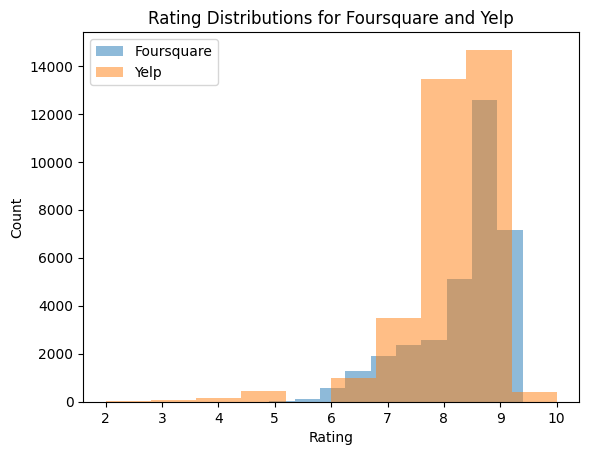

In [14]:
# Can examine how the ratings of each platform are distributed
# By using 'hist()' we group "fsq_rating" and "yelp_rating" into bins along the x-axis
    # "alpha = 0.5" is to set the transparency of the histograms
# The count of each bin is dependent on how many ratings fall within the specified range
plt.hist(clean_data_df['fsq_rating'], alpha = 0.5, label = 'Foursquare')
plt.hist(clean_data_df['yelp_rating'], alpha = 0.5, label = 'Yelp')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
plt.title('Rating Distributions for Foursquare and Yelp')
plt.show()

The histograms display the distribution of ratings for both Foursquare and Yelp. Each histogram shows how the ratings are distrbuted across different rating values. From observation, the distributions of ratings for both Foursquare and Yelp are similar with majority of the ratings ranging from 8.1 to 9.4 and 7.6 to 9.2, respectively.

#### Relationships between points of interest and bike stations

In [15]:
# Examine the DataFrame for station_name and relevant bike information
clean_data_df[['station_name', 'free_bikes', 'empty_slots', 'ebikes']].head()

,station_name,free_bikes,empty_slots,ebikes
1,Cégep Marie-Victorin,4,7,1
3,Cégep Marie-Victorin,4,7,1
5,Cégep Marie-Victorin,4,7,1
80,Gare d'autocars de Montréal (Berri / Ontario),11,3,0
81,Gare d'autocars de Montréal (Berri / Ontario),11,3,0


For each station we can see corresponding "free_bikes", "empty_slots" and "ebikes" columns in this subselection. We would like to determine the total number of bikes at each station. 

The total number of bikes (column-wise or axis = 1) would be "free_bikes" + "empty_slots" + "ebikes":
* free_bikes: the number of available bikes for rent
* empty_slots: the number of unavailable bikes (in other words, currently in use - at the time of API call) 
* ebikes: the number of available ebikes at that specific station (available/unavailable)


In addition, there are 'duplicate' rows seen above, but these are not acutally duplicates, it is due to how the different platforms categorize the places differently (as seen below). We can group the sum of all the entries corresponding to each 'station_name' to obtain the total number of bikes provided by that station and then accordingly draw conclusions based on observations.

In [16]:
# Use 'head()' (by default, we can view the first 5 rows) to confirm our previous statement, that the different platforms use different categorizations
clean_data_df.head()

,station_name,city_bike_latitude,city_bike_longitude,free_bikes,empty_slots,ebikes,fsq_name,fsq_categories,fsq_latitude,fsq_longitude,fsq_distance (m),fsq_rating,fsq_price,yelp_name,yelp_categories,yelp_latitude,yelp_longitude,yelp_distance (m),yelp_rating,yelp_price
1,Cégep Marie-Victorin,45.617500,-73.606011,4,7,1,Restaurant Prima Luna,['Italian Restaurant'],45.617439,-73.593995,941.0,7.4,1,Restaurant Prima Luna,"['Italian', 'Sushi Bars']",45.617234,-73.594176,920.960695,8.0,3
3,Cégep Marie-Victorin,45.617500,-73.606011,4,7,1,Restaurant Prima Luna,['Italian Restaurant'],45.617439,-73.593995,941.0,7.4,1,Grillades Sizzle,['Portuguese'],45.623980,-73.601030,808.741245,7.0,2
5,Cégep Marie-Victorin,45.617500,-73.606011,4,7,1,Restaurant Prima Luna,['Italian Restaurant'],45.617439,-73.593995,941.0,7.4,1,Pizzeria Etc (La),['Pizza'],45.617230,-73.593807,956.344667,9.0,2
80,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,11,3,0,Le Saint Bock,"['Bar', 'American Restaurant', 'Gastropub']",45.515893,-73.564685,132.0,8.5,2,L'Amère à Boire,"['Tapas Bars', 'Brewpubs']",45.516420,-73.566042,150.012599,8.0,2
81,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,11,3,0,Le Saint Bock,"['Bar', 'American Restaurant', 'Gastropub']",45.515893,-73.564685,132.0,8.5,2,Le Saint-Bock,['Brasseries'],45.515820,-73.564641,126.552913,8.0,2


In [17]:
# Select a subset of columns for analysis
# Apply the 'agg()' as a dictionary to specify the method of aggregration for each column
mod_clean_data_df = clean_data_df.groupby('station_name').agg({
    'free_bikes': 'sum',
    'empty_slots': 'sum',
    'ebikes': 'sum',
    'fsq_rating': 'mean',
    'fsq_distance (m)': 'mean',
    'yelp_rating': 'mean',
    'yelp_distance (m)': 'mean'
}).reset_index()

mod_clean_data_df.head()

,station_name,free_bikes,empty_slots,ebikes,fsq_rating,fsq_distance (m),yelp_rating,yelp_distance (m)
0,11e avenue / du Souvenir,1188,324,864,6.711111,868.555556,8.000000,932.117633
1,12e avenue / St-Zotique,264,1188,66,7.450000,719.500000,8.363636,820.001856
2,15e avenue / Masson,936,1352,0,8.112500,500.250000,7.538462,672.873370
3,16e avenue / St-Joseph,480,780,0,8.260000,648.400000,7.666667,792.925089
4,19e avenue / St-Zotique,833,147,147,7.114286,673.857143,7.571429,796.855757


In [18]:
# Create a new column "total_bikes" equal to the sum of "free_bikes", "empty_slots" and "ebike" (column-wise)
mod_clean_data_df['total_bikes'] = mod_clean_data_df[['free_bikes', 'empty_slots', 'ebikes']].sum(axis = 1)

In [19]:
mod_clean_data_df = mod_clean_data_df.sort_values(by = 'total_bikes', ascending = False).rename(
    columns = {'fsq_rating': 'fsq_avg_rating', 'fsq_distance (m)': 'fsq_avg_distance (m)',
               'yelp_rating': 'yelp_avg_rating', 'yelp_distance (m)': 'yelp_avg_distance (m)',})

mod_clean_data_df

,station_name,free_bikes,empty_slots,ebikes,fsq_avg_rating,fsq_avg_distance (m),yelp_avg_rating,yelp_avg_distance (m),total_bikes
322,de la Commune / King,7938,3402,0,8.888889,467.222222,8.611111,519.888219,11340
323,de la Commune / Place Jacques-Cartier,7344,714,0,8.833333,135.333333,8.058824,232.070538,8058
32,Berri / Cherrier,5120,640,960,8.862500,470.250000,8.500000,510.764503,6720
256,Square St-Louis (du Square St-Louis / Laval),4680,900,720,8.688889,373.000000,8.500000,418.284359,6300
305,de Gaspé / Marmier,2340,1440,2160,8.733333,459.222222,8.750000,687.626253,5940
...,...,...,...,...,...,...,...,...,...
219,Parc Summerlea (53e avenue / St-Joseph),28,2,6,6.200000,887.000000,7.000000,883.681423,36
239,Place du Village (St-Jean-Baptiste / Notre-Dame),8,18,4,6.100000,864.500000,8.000000,896.623681,30
197,Parc Henri-Dunant (Léger / Henri-Dunant),8,9,3,6.600000,868.000000,5.000000,1076.495660,20
20,Aréna Chaumont (Chaumont / des Ormeaux),2,16,1,7.600000,459.000000,9.000000,157.464156,19


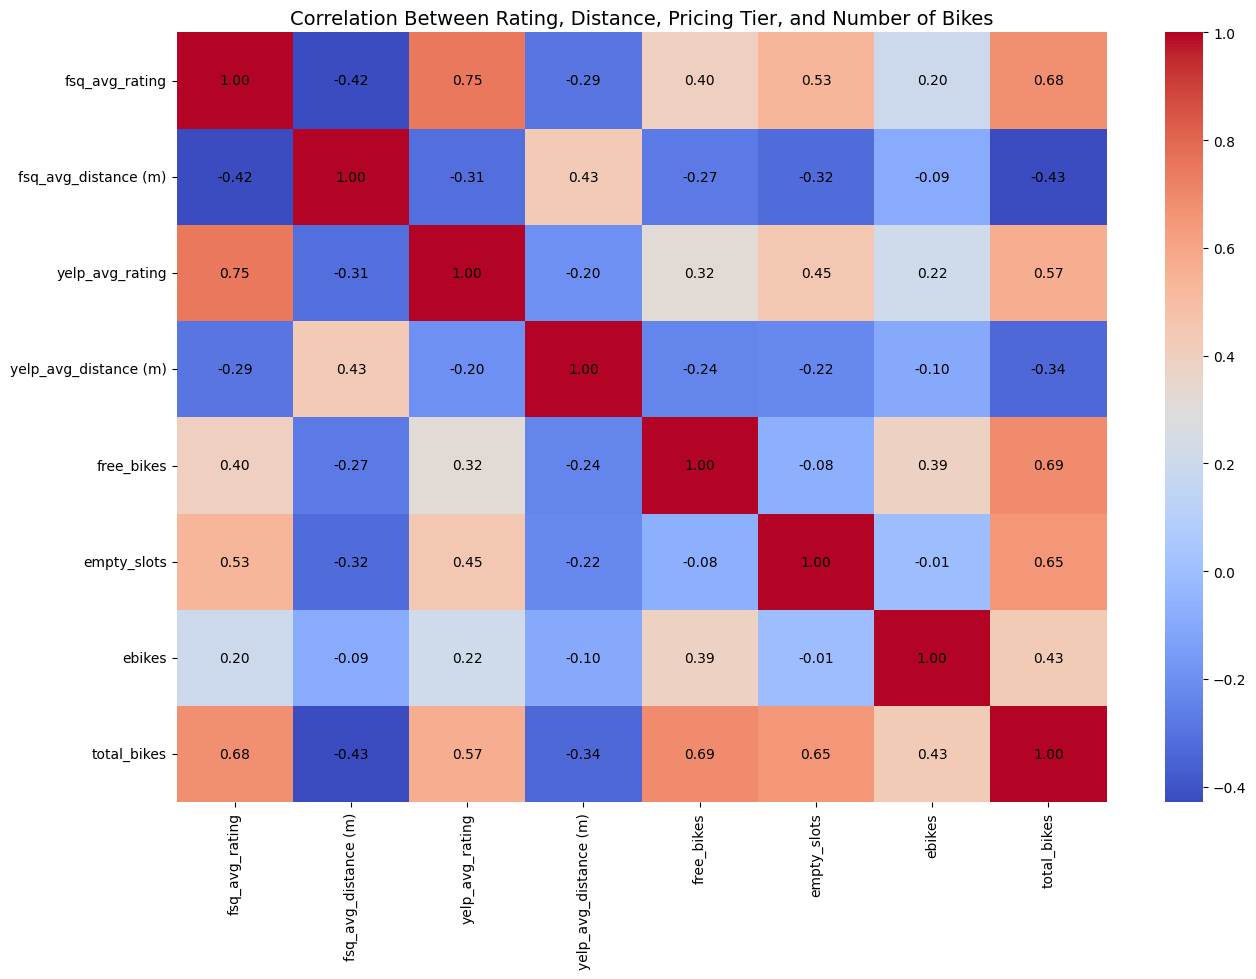

In [20]:
# Check to see if there is any correlation between the ratings provided (by Foursquare and Yelp) and the pricing tier of the place
ratings_and_price_corr = mod_clean_data_df[['fsq_avg_rating', 'fsq_avg_distance (m)', 'yelp_avg_rating', 'yelp_avg_distance (m)', 'free_bikes', 'empty_slots', 'ebikes', 'total_bikes']].corr()

# Plot the heatmap using 'figure()' to size it
plt.figure(figsize = (15, 10))
# sns.heatmap() is used to provide a graphical representation of data where values are depicted by colour
# 'ratings_and_price_corr' is our correlation matrix to visualize, 'annot' is used to display data in the first row, 'cmp' to define colour scheme, and fmt is the siginificant digits
ax = sns.heatmap(ratings_and_price_corr, annot = False, cmap = 'coolwarm', fmt = '.2f')

# Set the title
plt.title('Correlation Between Rating, Distance, Pricing Tier, and Number of Bikes', fontsize = 14)

# To display the correlation values in each cell we can loop through each row and column
# shape[0] and shape[1] indices gives the number of rows and columns, respectively
for i in range(ratings_and_price_corr.shape[0]):
    for j in range(ratings_and_price_corr.shape[1]):
        
        text = "{:.2f}".format(ratings_and_price_corr.iloc[i, j])  # Use .iloc to access elements
        # Display the the values (considered text) based on (x,y) coordinates and aligned in the center 
        ax.text(j + 0.5, i + 0.5, text, ha = 'center', va = 'center', fontsize = 10)

plt.show()

Based on the correlation guidelines previously mentioned, possible interpretations of the heatmap could be:

* There is a moderate negative correlation between fsq_rating and fsq_distance (m), but a weak negative correlation between yelp_rating and yelp_distance (m). 
    * Based on Foursquare data, this suggests that as the distance from the station increases, the rating tends to decrease, indicating that places closer to the station tend to have higher ratings.
    * Based on Yelp data, the same cannot not be said.
<p></p>
* There is a strong positive correlation between fsq_rating and total_bikes, and a moderate positive correlation between yelp_rating and total_bikes.
    * Based on both platforms, this could indicate that stations with more bikes are in highly populated or popular areas, where people tend to frequent. These popular areas may have higher-rated establishments, contributing to the correlation.   
<p></p>
* In general, there is a moderate positive correlation between the rating and available/unavailable bikes, but there is a weak correlation between the rating and available/unavailable ebikes.
<p></p>
* There is a moderate negative correlation between fsq_distance (m) and total_bikes, and a weak negative correlation between yelp_distance (m) and total_bikes.
    * Based on Foursquare data, this suggests that the total number of bikes at a station decreases as the distance from the place and the station increases.
    * Based on Yelp data, the same cannot be said.

In [21]:
# Build a DataFrame that demonstrates a relationship between the number of bikes and points of interests at that location
# Drop the columns "free_bikes", "empty_slots" and "ebike" (column-wise)
model_df = mod_clean_data_df.drop(['free_bikes', 'empty_slots', 'ebikes'], axis = 1)

# Use 'reset_index() with "drop = True" to drop existing index and set default integer-based index
model_df.reset_index(drop = True, inplace = True)

# Save DataFrame to a CSV file without row index value
model_df.to_csv("../data/statsmodel_df.csv", index = False)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   station_name           336 non-null    object 
 1   fsq_avg_rating         336 non-null    float64
 2   fsq_avg_distance (m)   336 non-null    float64
 3   yelp_avg_rating        336 non-null    float64
 4   yelp_avg_distance (m)  336 non-null    float64
 5   total_bikes            336 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 15.9+ KB


# Database

### Put all results in an SQLite3 database

Assumption: Use raw CSV files generated from part 1 ('montreal_bike_stations.csv') and part 2 ('foursquare_places.csv' and 'yelp_places.csv'),

In [22]:
# Import sqlite3 and the module's Error class
import sqlite3
from sqlite3 import Error

city_bikes_df = pd.read_csv('../data/montreal_bike_stations.csv')
fsq_df = pd.read_csv('../data/foursquare_places.csv')
yelp_df = pd.read_csv('../data/yelp_places.csv')

In [23]:
# Define a function that accepts the path to the database
def create_connection(path):
    connection = None
    try:
        # If the database exists at the specified location, then the connection is established
        # If the database does not exist at the specified location, it is created and the connection is established
        connection = sqlite3.connect(path)
        print("Connection to 'city_bike_poi' database successful")
    # Handle cases where 'connect()' fails to establish a connection
    except Error as e:
        print(f"The error '{e}' occurred")     
    return connection

# Define a function to execute queries (e.g. create tables or update and delete queries)
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        # 'execute()' any query passed to it
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

# Define a function to select records
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        # To select records using SQLite, we can call cursor.execute() followed by 'fetchall()'
        cursor.execute(query)
        # The method 'fetchall()' returns a list of tuples where each tuple is mapped to corresponding row in retrieved records
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [24]:
connection = create_connection("../data/city_bike_poi.sqlite")

# Write the DataFrames to the database
fsq_df.to_sql('foursquare_poi', connection, if_exists = 'replace', index = False)
yelp_df.to_sql('yelp_poi', connection, if_exists = 'replace', index = False)
city_bikes_df.to_sql('montreal_bike_stations', connection, if_exists = 'replace', index = False)

# Close the database connection
connection.close()

Connection to 'city_bike_poi' database successful


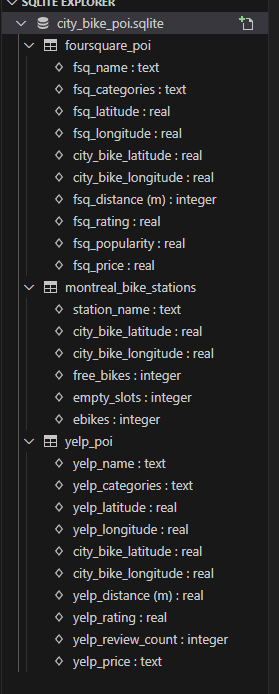

A similar procedure used earlier can be repeated here, except all the rows will be kept (no null rows will not be removed - the process was done for EDA). According to the [SQLite](https://www.sqlite.org/datatype3.html) documentation we can see that it only supports 5 data types, unlike PostgreSQL.

SQLite does not offer support for altering a column's data type, instead one would have to recreate a new table, import all the necessary data and then remove the old table. As such, the procedure of converting data types will not be performed below. However, the data will be standardized, in other words we will scale "yelp_rating" to match that of "fsq_rating" and will map "yelp_price" to integer equivalents.

##### Standardize the 'rating' data by scaling "yelp_rating"


In [25]:
# Establish connection to the database
connection = create_connection("../data/city_bike_poi.sqlite")

# Use the query to check the current values in "yelp_rating" for a limited number of rows
query_check = """
SELECT
    yelp_rating
FROM 
    yelp_poi
LIMIT 5
"""

# 'execute_read_query(connection, query)' function call for the the entires 
yelp_ratings = execute_read_query(connection, query_check)
# for each entry, we can then print the result
for yelp_rating in yelp_ratings:
    print(yelp_rating)

Connection to 'city_bike_poi' database successful
(5.0,)
(4.0,)
(4.0,)
(3.5,)
(4.5,)


In [26]:
# Use the query to UPDATE and SET table 'yelp_poi' in the database 
query_exe = """
UPDATE
    yelp_poi
SET
    yelp_rating = (yelp_rating*2)
"""

execute_query(connection, query_exe)

# Re-run initial query to see that the result has been unpdated.
query_check = """
SELECT
    yelp_rating
FROM 
    yelp_poi
LIMIT 5
"""

yelp_ratings = execute_read_query(connection, query_check)

for yelp_rating in yelp_ratings:
    print(yelp_rating)

connection.close()
print("Disconnected from 'city_bike_poi' database")

Query executed successfully
(10.0,)
(8.0,)
(8.0,)
(7.0,)
(9.0,)
Disconnected from 'city_bike_poi' database


##### Standardize the 'rating' data by mapping "yelp_price"


In [27]:
connection = create_connection("../data/city_bike_poi.sqlite")

query_check = """
SELECT
    yelp_price
FROM 
    yelp_poi
LIMIT 5
"""

yelp_prices = execute_read_query(connection, query_check)

for yelp_price in yelp_prices:
    print(yelp_price)

Connection to 'city_bike_poi' database successful
(None,)
('$$$',)
(None,)
('$$',)
(None,)


In [28]:
query_exe = """
UPDATE yelp_poi
SET yelp_price = 
    CASE yelp_price
        WHEN '$' THEN 1
        WHEN '$$' THEN 2
        WHEN '$$$' THEN 3
        WHEN '$$$$' THEN 4
     END
"""

execute_query(connection, query_exe)

query_check = """
SELECT
    yelp_price
FROM 
    yelp_poi
LIMIT 5
"""

yelp_prices = execute_read_query(connection, query_check)

for yelp_price in yelp_prices:
    print(yelp_price)
    
connection.close()
print("Disconnected from 'city_bike_poi' database")

Query executed successfully
(None,)
('3',)
(None,)
('2',)
(None,)
Disconnected from 'city_bike_poi' database


### Look at the data before and after the join to validate your data.

In [29]:
connection = create_connection("../data/city_bike_poi.sqlite")

# SQLite does not support 'RIGHT OUTER JOIN' and 'FULL OUTER JOIN'
merged_df = """
SELECT * 
FROM 
    montreal_bike_stations
LEFT OUTER JOIN foursquare_poi
    ON foursquare_poi.city_bike_latitude = montreal_bike_stations.city_bike_latitude
    AND foursquare_poi.city_bike_longitude = montreal_bike_stations.city_bike_longitude
LEFT OUTER JOIN yelp_poi
    ON yelp_poi.city_bike_latitude = montreal_bike_stations.city_bike_latitude
    AND yelp_poi.city_bike_longitude = montreal_bike_stations.city_bike_longitude
LIMIT 10
"""
stations = execute_read_query(connection, merged_df)

for station in stations:
    print('\n', station)
    
connection.close()
print("\nDisconnected from 'city_bike_poi' database")

Connection to 'city_bike_poi' database successful

 ('Cégep Marie-Victorin', 45.61749978312808, -73.60601127147675, 4, 7, 1, 'Ecafé', "['Restaurant']", 45.611729, -73.606237, 45.61749978312808, -73.60601127147675, 641, None, None, None, 'Boulangerie Adriatica', "['Italian', 'Pizza']", 45.61521, -73.60971, 45.61749978312808, -73.60601127147675, 365.54278795354594, 8.0, 1, None)

 ('Cégep Marie-Victorin', 45.61749978312808, -73.60601127147675, 4, 7, 1, 'Ecafé', "['Restaurant']", 45.611729, -73.606237, 45.61749978312808, -73.60601127147675, 641, None, None, None, 'Capucine', "['Italian']", 45.6196699281717, -73.6097039384337, 45.61749978312808, -73.60601127147675, 375.1109995539719, 10.0, 4, None)

 ('Cégep Marie-Victorin', 45.61749978312808, -73.60601127147675, 4, 7, 1, 'Ecafé', "['Restaurant']", 45.611729, -73.606237, 45.61749978312808, -73.60601127147675, 641, None, None, None, 'Dagostino Pizza', "['Pizza']", 45.62479, -73.59907, 45.61749978312808, -73.60601127147675, 975.918228706879,

Sample from SQLite Explorer

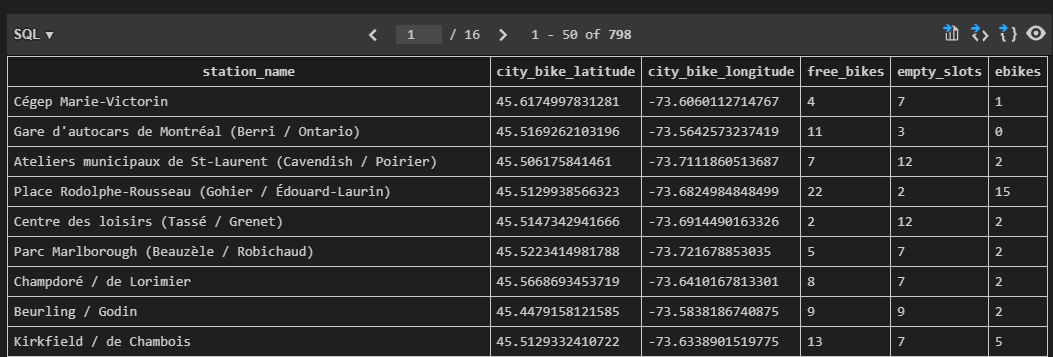
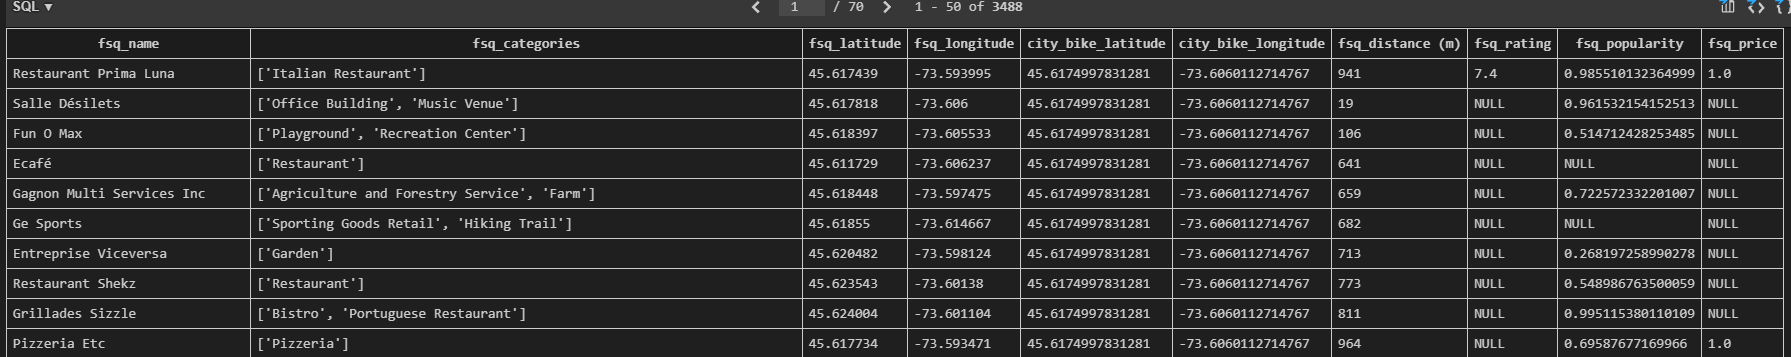
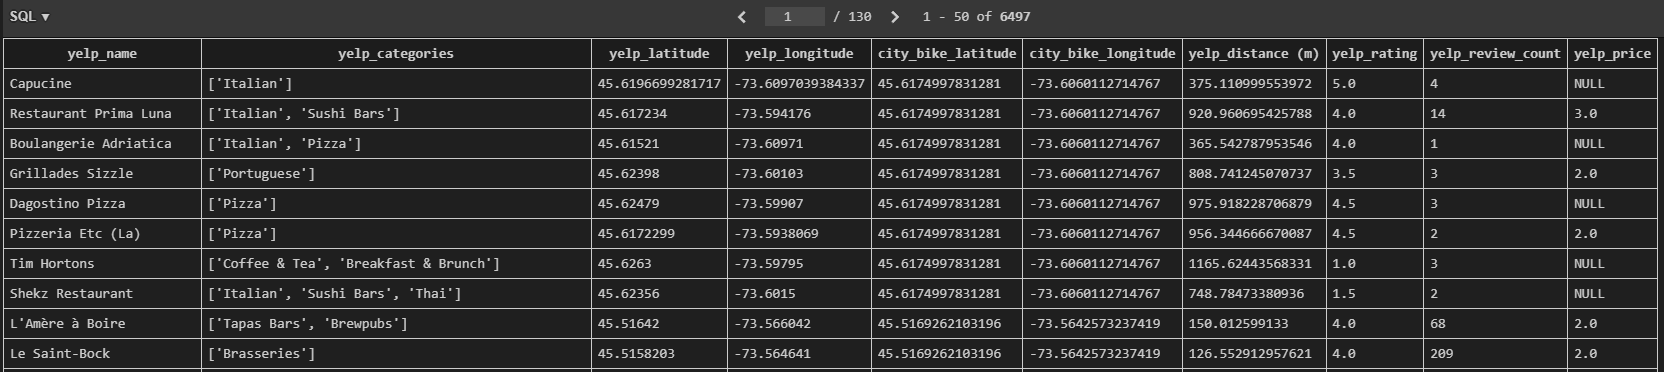